<a href="https://colab.research.google.com/github/Algi21/Final-Project---Employe-Recruitment/blob/main/Final_Project_Stage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


In [ ]:
import pandas as pd

# Atur opsi tampilan pandas sebelum membaca data atau menampilkan DataFrame
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', 1000)      # Atau angka yang lebih besar sesuai kebutuhan lebar layar Anda

# Original Google Drive sharing link
google_drive_sharing_link = "https://drive.google.com/file/d/1Yd1Vqd14qw0ZPt8yNPkumkTIfOnykQeQ/view?usp=sharing"

# Extract the file ID from the sharing link
file_id = google_drive_sharing_link.split('/')[-2]

# Construct the direct download link
direct_download_link = f"https://drive.google.com/uc?export=download&id={file_id}"

# Import the data using pandas.read_csv() dan simpan ke variabel df
df = pd.read_csv(direct_download_link)

# Sekarang df sudah didefinisikan, sehingga Anda bisa memanggil head()
df.sample(10)

,candidate_id,job_id,education_level,years_experience,num_relevant_skills,skills,internal_referral,interview_score,technical_test_score,soft_skill_score,hiring_eligibility
2546,2547,3057,Bachelor,6,2,"Communication, SQL",Yes,3.93,2.86,7.50,Not Eligible
4406,4407,4884,Bachelor,3,2,"Cloud Computing, SQL, Communication",No,4.44,5.12,5.23,Not Eligible
2737,2738,3382,Bachelor,11,4,"SQL, Machine Learning, Python",No,6.89,1.69,1.88,Not Eligible
3989,3990,865,Bachelor,0,3,SQL,No,5.81,3.59,4.78,Not Eligible
1226,1227,2382,Bachelor,12,4,"Cloud Computing, Excel, Machine Learning, Data...",No,9.25,6.45,9.00,Not Eligible
212,213,1635,Master,14,3,"Leadership, Python, Data Visualization",No,5.63,7.35,3.58,Eligible
4352,4353,3599,Bachelor,8,1,"Leadership, Excel, SQL",No,6.94,9.58,4.18,Not Eligible
4798,4799,2436,Master,5,1,"Excel, Data Visualization",No,5.53,3.69,7.84,Not Eligible
2763,2764,375,Bachelor,5,2,"Communication, Machine Learning, Data Visualiz...",Yes,7.57,1.37,2.88,Eligible
207,208,1610,Bachelor,19,2,"Cloud Computing, Python, Machine Learning, Excel",No,6.03,1.62,3.88,Not Eligible


#About Dataset




#Info masing-masing Dataset

#Definisi kolom

| No | Kolom                  | Tipe Data | Deskripsi                                                                                               |
| -- | ---------------------- | --------- | ------------------------------------------------------------------------------------------------------- |
| 0  | `candidate_id`         | `int64`   | ID unik untuk setiap kandidat. Digunakan sebagai pengenal utama.                                        |
| 1  | `job_id`               | `int64`   | ID unik untuk posisi pekerjaan yang dilamar. Mengindikasikan relasi kandidat dengan lowongan tertentu.  |
| 2  | `education_level`      | `object`  | Tingkat pendidikan terakhir kandidat (misalnya: SMA, S1, S2, dll).                                      |
| 3  | `years_experience`     | `int64`   | Jumlah tahun pengalaman kerja kandidat secara total.                                                    |
| 4  | `num_relevant_skills`  | `int64`   | Jumlah keterampilan kandidat yang relevan dengan pekerjaan yang dilamar.                                |
| 5  | `skills`               | `object`  | Daftar keterampilan yang dimiliki kandidat (kemungkinan dalam bentuk teks yang dipisah koma atau list). |
| 6  | `internal_referral`    | `object`  | Apakah kandidat mendapat referensi internal dari karyawan perusahaan (`Yes`/`No`).                      |
| 7  | `interview_score`      | `float64` | Skor wawancara kandidat, biasanya dari hasil penilaian HR atau interviewer.                             |
| 8  | `technical_test_score` | `float64` | Skor dari tes teknis kandidat, seperti coding test atau tes keterampilan khusus.                        |
| 9  | `soft_skill_score`     | `float64` | Skor keterampilan non-teknis kandidat, seperti komunikasi, kerja tim, kepemimpinan.                     |
| 10 | `hiring_eligibility`   | `object`  | Label target (output), menunjukkan apakah kandidat layak direkrut (`Eligible`/`Not Eligible`).          |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   candidate_id          5000 non-null   int64  
 1   job_id                5000 non-null   int64  
 2   education_level       5000 non-null   object 
 3   years_experience      5000 non-null   int64  
 4   num_relevant_skills   5000 non-null   int64  
 5   skills                5000 non-null   object 
 6   internal_referral     5000 non-null   object 
 7   interview_score       5000 non-null   float64
 8   technical_test_score  5000 non-null   float64
 9   soft_skill_score      5000 non-null   float64
 10  hiring_eligibility    5000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 429.8+ KB


#Split kolom skills untuk analisis

In [ ]:
# Gunakan get_dummies setelah join list ke string (jika belum string)
df_split = df['skills'].str.get_dummies(sep=', ')

# Gabungkan ke df asli (drop kolom skills jika perlu)
df = df.drop('skills', axis=1).join(df_split)

In [ ]:
# Ubah nama kolom
df = df.rename(columns={'Cloud Computing': 'Cloud_Computing',
                        'Data Visualization': 'Data_Visualization',
                        'Machine Learning': 'Machine_Learning',
  })

mengubah nama kolom agar tidak mengandung spasi yang menggagu prossesing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   candidate_id          5000 non-null   int64  
 1   job_id                5000 non-null   int64  
 2   education_level       5000 non-null   object 
 3   years_experience      5000 non-null   int64  
 4   num_relevant_skills   5000 non-null   int64  
 5   internal_referral     5000 non-null   object 
 6   interview_score       5000 non-null   float64
 7   technical_test_score  5000 non-null   float64
 8   soft_skill_score      5000 non-null   float64
 9   hiring_eligibility    5000 non-null   object 
 10  Cloud_Computing       5000 non-null   int64  
 11  Communication         5000 non-null   int64  
 12  Data_Visualization    5000 non-null   int64  
 13  Excel                 5000 non-null   int64  
 14  Leadership            5000 non-null   int64  
 15  Machine_Learning     

In [ ]:
df.head()

,candidate_id,job_id,education_level,years_experience,num_relevant_skills,internal_referral,interview_score,technical_test_score,soft_skill_score,hiring_eligibility,Cloud_Computing,Communication,Data_Visualization,Excel,Leadership,Machine_Learning,Python,SQL
0,1,4901,Master,17,2,No,1.47,5.53,7.30,Not Eligible,1,0,0,0,0,0,1,0
1,2,2804,Bachelor,19,3,No,8.46,7.27,7.57,Eligible,0,0,0,0,1,1,0,0
2,3,3634,Bachelor,6,3,Yes,8.62,6.88,5.47,Eligible,0,0,1,0,0,0,1,1
3,4,1218,Master,1,4,No,7.78,1.07,8.54,Not Eligible,0,0,1,0,0,0,0,1
4,5,526,Bachelor,9,3,Yes,7.94,1.75,4.33,Eligible,0,1,0,1,0,0,1,0


In [ ]:
#Kelompokan data berdasarkan jenisnya

numerical_features = []
categorical_features = []
id_columns = ['candidate_id','job_id'] # Langsung inisialisasi sebagai list berisi 'customerID'


# Loop melalui kolom dan dtipe-nya
for col in df.columns:
    # Periksa apakah kolom saat ini ada di dalam list id_columns
    if col in id_columns:
        continue # Lewati kolom ID karena sudah diidentifikasi

    if df[col].dtype == 'object':
        categorical_features.append(col)
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numerical_features.append(col)

print("Kolom Numerik (Numerical Features):")
print(numerical_features)
print(f"Jumlah Kolom Numerik: {len(numerical_features)}\n")

print("Kolom Kategorikal (Categorical Features):")
print(categorical_features)
print(f"Jumlah Kolom Kategorikal: {len(categorical_features)}\n")

print("Kolom ID:")
print(id_columns)
print(f"Jumlah Kolom ID: {len(id_columns)}")

# total kolom yang diproses
total_processed_columns = len(numerical_features) + len(categorical_features) + len(id_columns)
print(f"\nTotal kolom yang diproses: {total_processed_columns}")
print(f"Total kolom dalam DataFrame asli: {df.shape[1]}")

Kolom Numerik (Numerical Features):
['years_experience', 'num_relevant_skills', 'interview_score', 'technical_test_score', 'soft_skill_score', 'Cloud_Computing', 'Communication', 'Data_Visualization', 'Excel', 'Leadership', 'Machine_Learning', 'Python', 'SQL']
Jumlah Kolom Numerik: 13

Kolom Kategorikal (Categorical Features):
['education_level', 'internal_referral', 'hiring_eligibility']
Jumlah Kolom Kategorikal: 3

Kolom ID:
['candidate_id', 'job_id']
Jumlah Kolom ID: 2

Total kolom yang diproses: 18
Total kolom dalam DataFrame asli: 18


#Exploratory Data Analysis


##Descriptive Statistics

In [ ]:
df[numerical_features].describe()

,years_experience,num_relevant_skills,interview_score,technical_test_score,soft_skill_score,Cloud_Computing,Communication,Data_Visualization,Excel,Leadership,Machine_Learning,Python,SQL
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,9.534400,2.507800,5.522932,5.514122,5.396680,0.311400,0.307800,0.301600,0.310000,0.31580,0.318200,0.311000,0.311600
std,5.741969,1.119192,2.620521,2.611497,2.571927,0.463112,0.461629,0.458998,0.462539,0.46488,0.465824,0.462949,0.463194
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,3.260000,3.230000,3.170000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,3.000000,5.490000,5.550000,5.360000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,14.000000,4.000000,7.820000,7.800000,7.570000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,19.000000,4.000000,9.980000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Pengamatan dari statistik kolom numerik:<br>
Terlihat nilai mean dan median dari masing-masing kolom tidak berbeda jauh, menandakan distribusi data cenderung normal


In [ ]:
df[categorical_features].describe()

,education_level,internal_referral,hiring_eligibility
count,5000,5000,5000
unique,3,2,2
top,Bachelor,No,Not Eligible
freq,3476,3529,3516


* ukuran data set untuk ketiga fitur kategorikal sama yaitu 500
* pada fitur educational_level memiliki 3 nilai unik dan kategori paling sering muncul yaitu " Bachelor" dengan frekuensi 3476 kali
* pada fitur internal_referral memiliki 2 nilai unik dengan kategori paling sering muncul yaitu "No" dengan frekuensi sebanyak 3529 kali
* fitur hiring_eligibility memiliki 2 nilai unik dengan kategori paling sering muncul yaitu  "Not Eligible" dengan frekuensi sebanyaj 3516 kali.


In [ ]:
df.isna().sum()

,0
candidate_id,0
job_id,0
education_level,0
years_experience,0
num_relevant_skills,0
internal_referral,0
interview_score,0
technical_test_score,0
soft_skill_score,0
hiring_eligibility,0


In [ ]:
#Cek duplikasi data
df.duplicated().sum()

np.int64(0)

### Menampilkan box plot kolom numerik

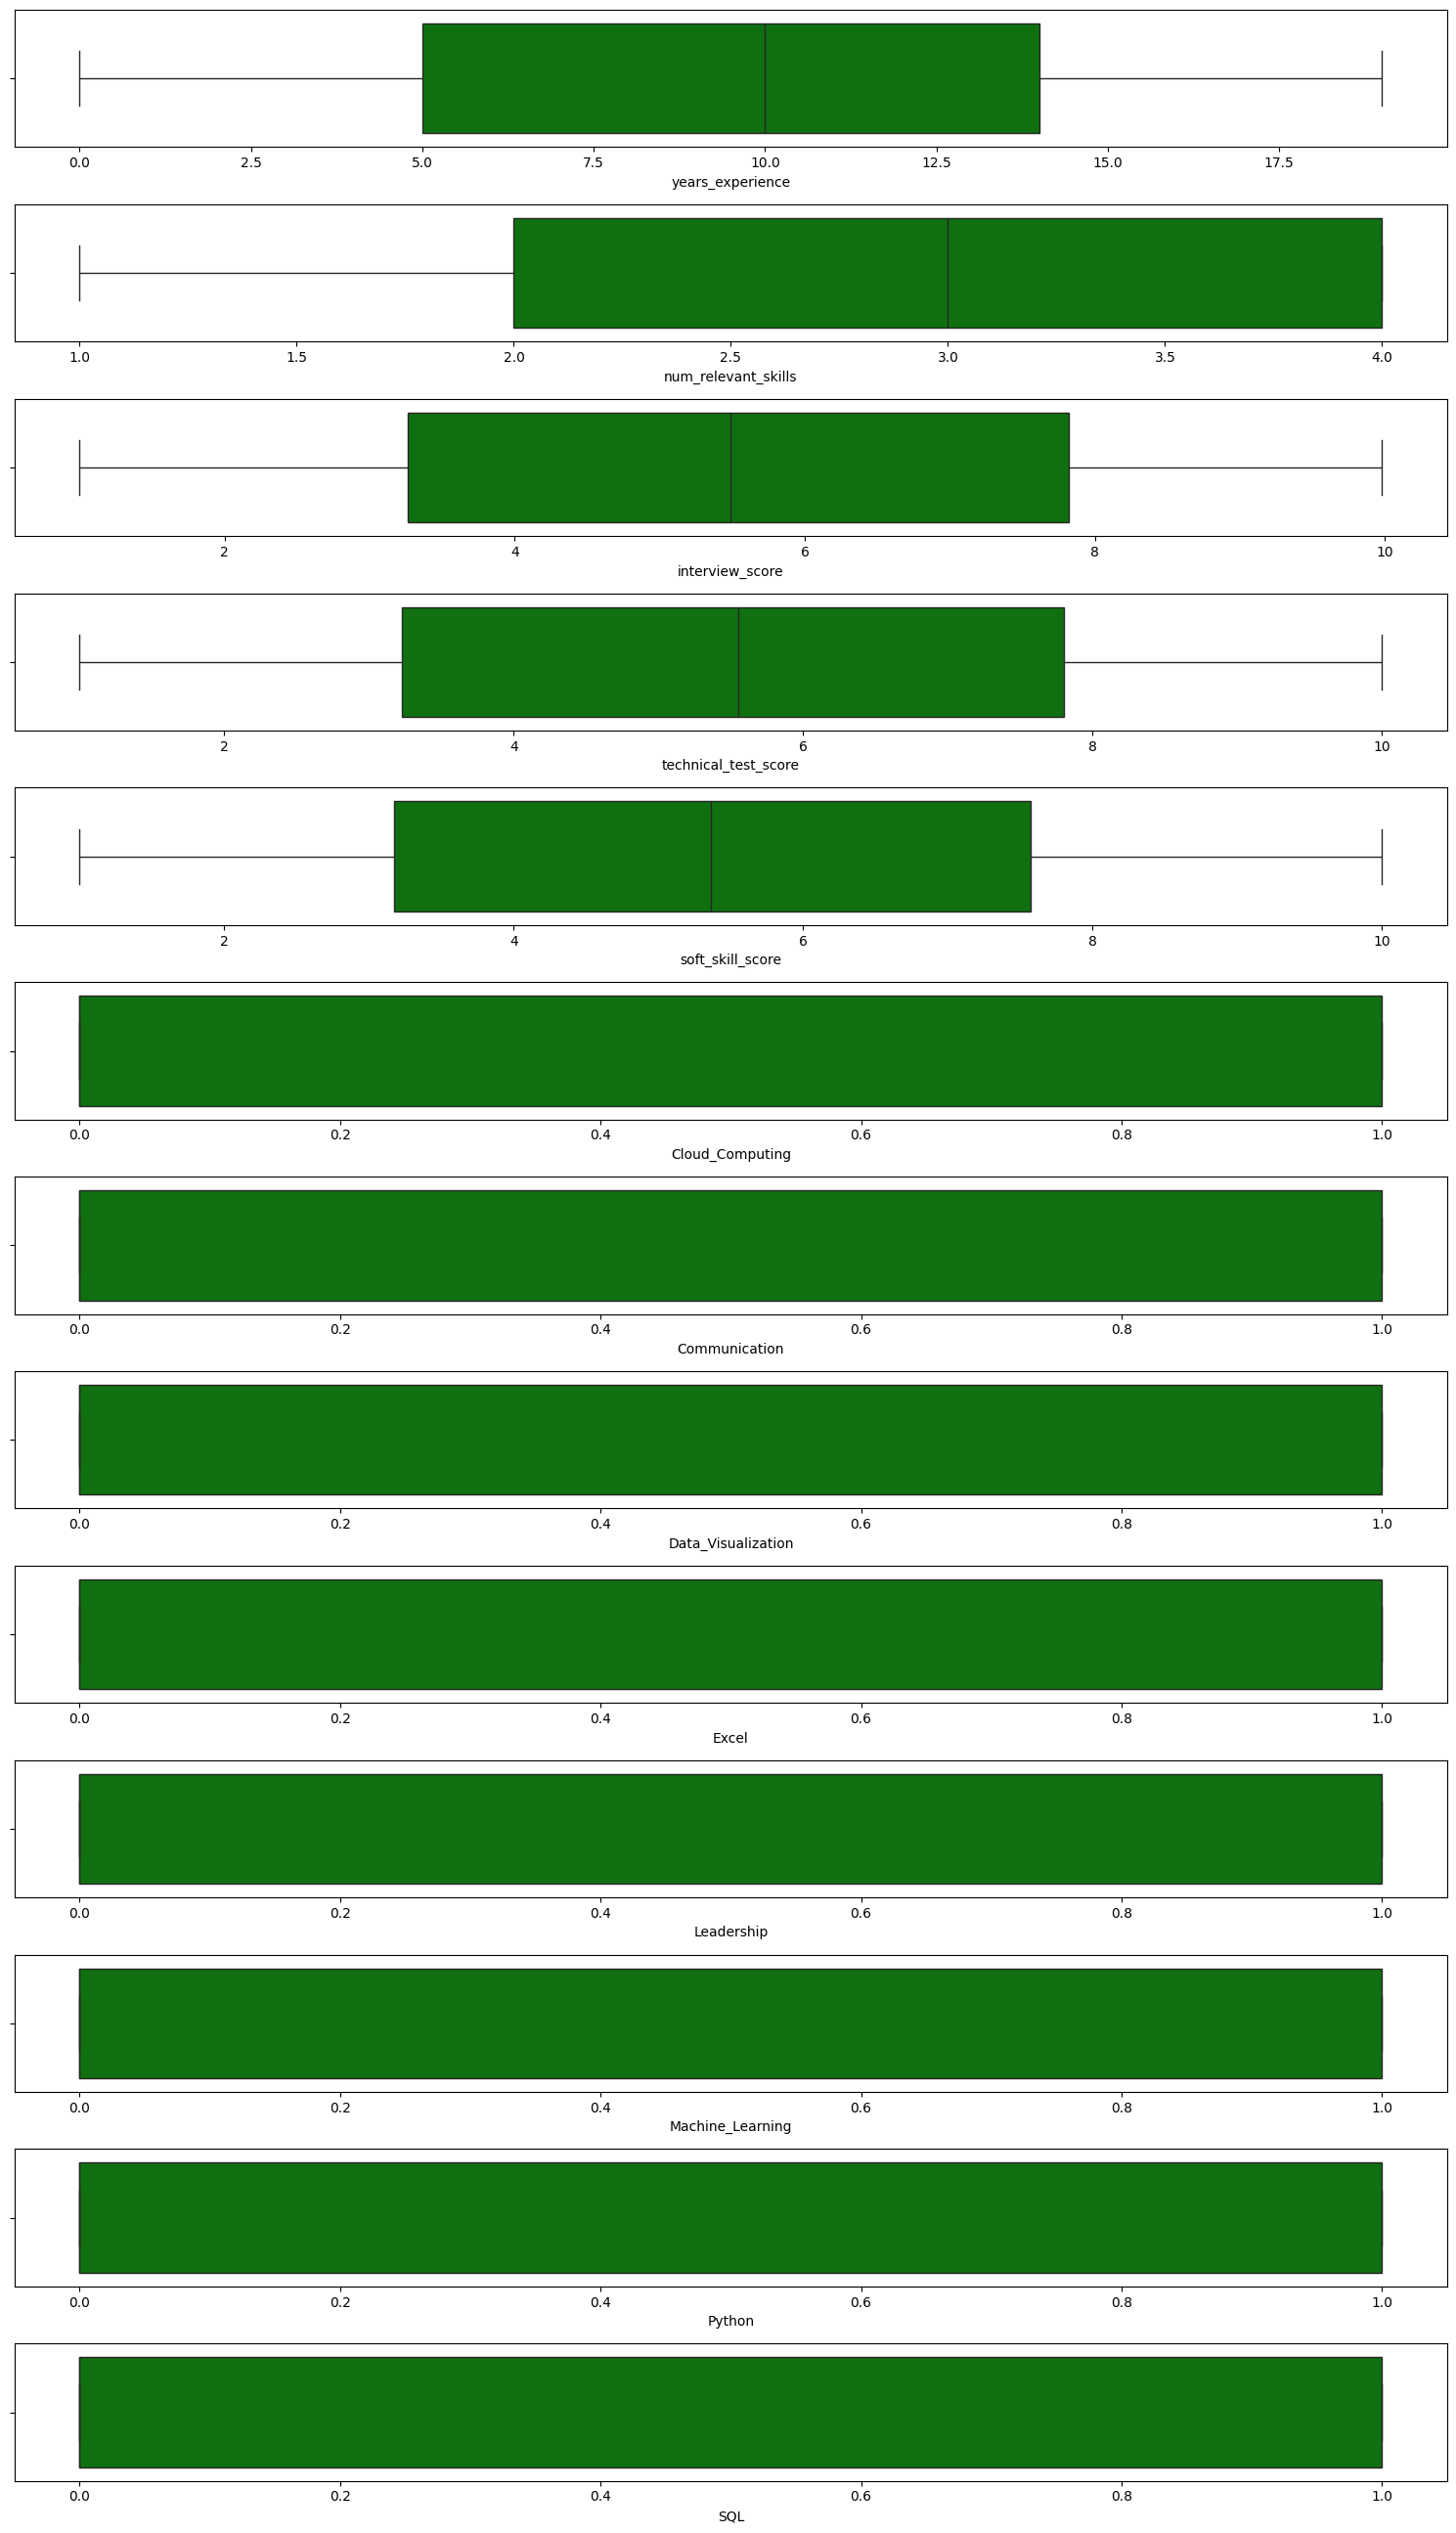

In [ ]:
plt.figure(figsize=(15, len(numerical_features)*2))

for i in range(0,len(numerical_features)):
    plt.subplot(len(numerical_features), 1, i+1)
    sns.boxplot(x=df[numerical_features[i]], color='green', orient='h')


plt.tight_layout()
plt.show()

Secara umum, kelima fitur menunjukkan distribusi yang relatif simetris tanpa outlier ekstrem, dengan median yang condong ke tengah rentang nilai. Misalnya, years_experience memiliki sebaran yang cukup luas (0–19 tahun), namun mayoritas kandidat memiliki pengalaman sekitar 10 tahun. Sementara itu, skor tes (interview, teknikal, dan soft skill) cenderung berada pada rentang 3 hingga 9, menunjukkan bahwa sebagian besar kandidat memiliki performa yang cukup baik dalam tes. num_relevant_skills memiliki distribusi sempit (1–4), mengindikasikan bahwa kandidat umumnya hanya memiliki beberapa keterampilan yang relevan, yang mungkin menjadi faktor penting dalam proses seleksi. Tidak terlihat outlier mencolok, yang menandakan kualitas data relatif bersih dan siap untuk digunakan dalam analisis atau pemodelan prediktif.

### Menampilakn distribusi (histogram + KDE)

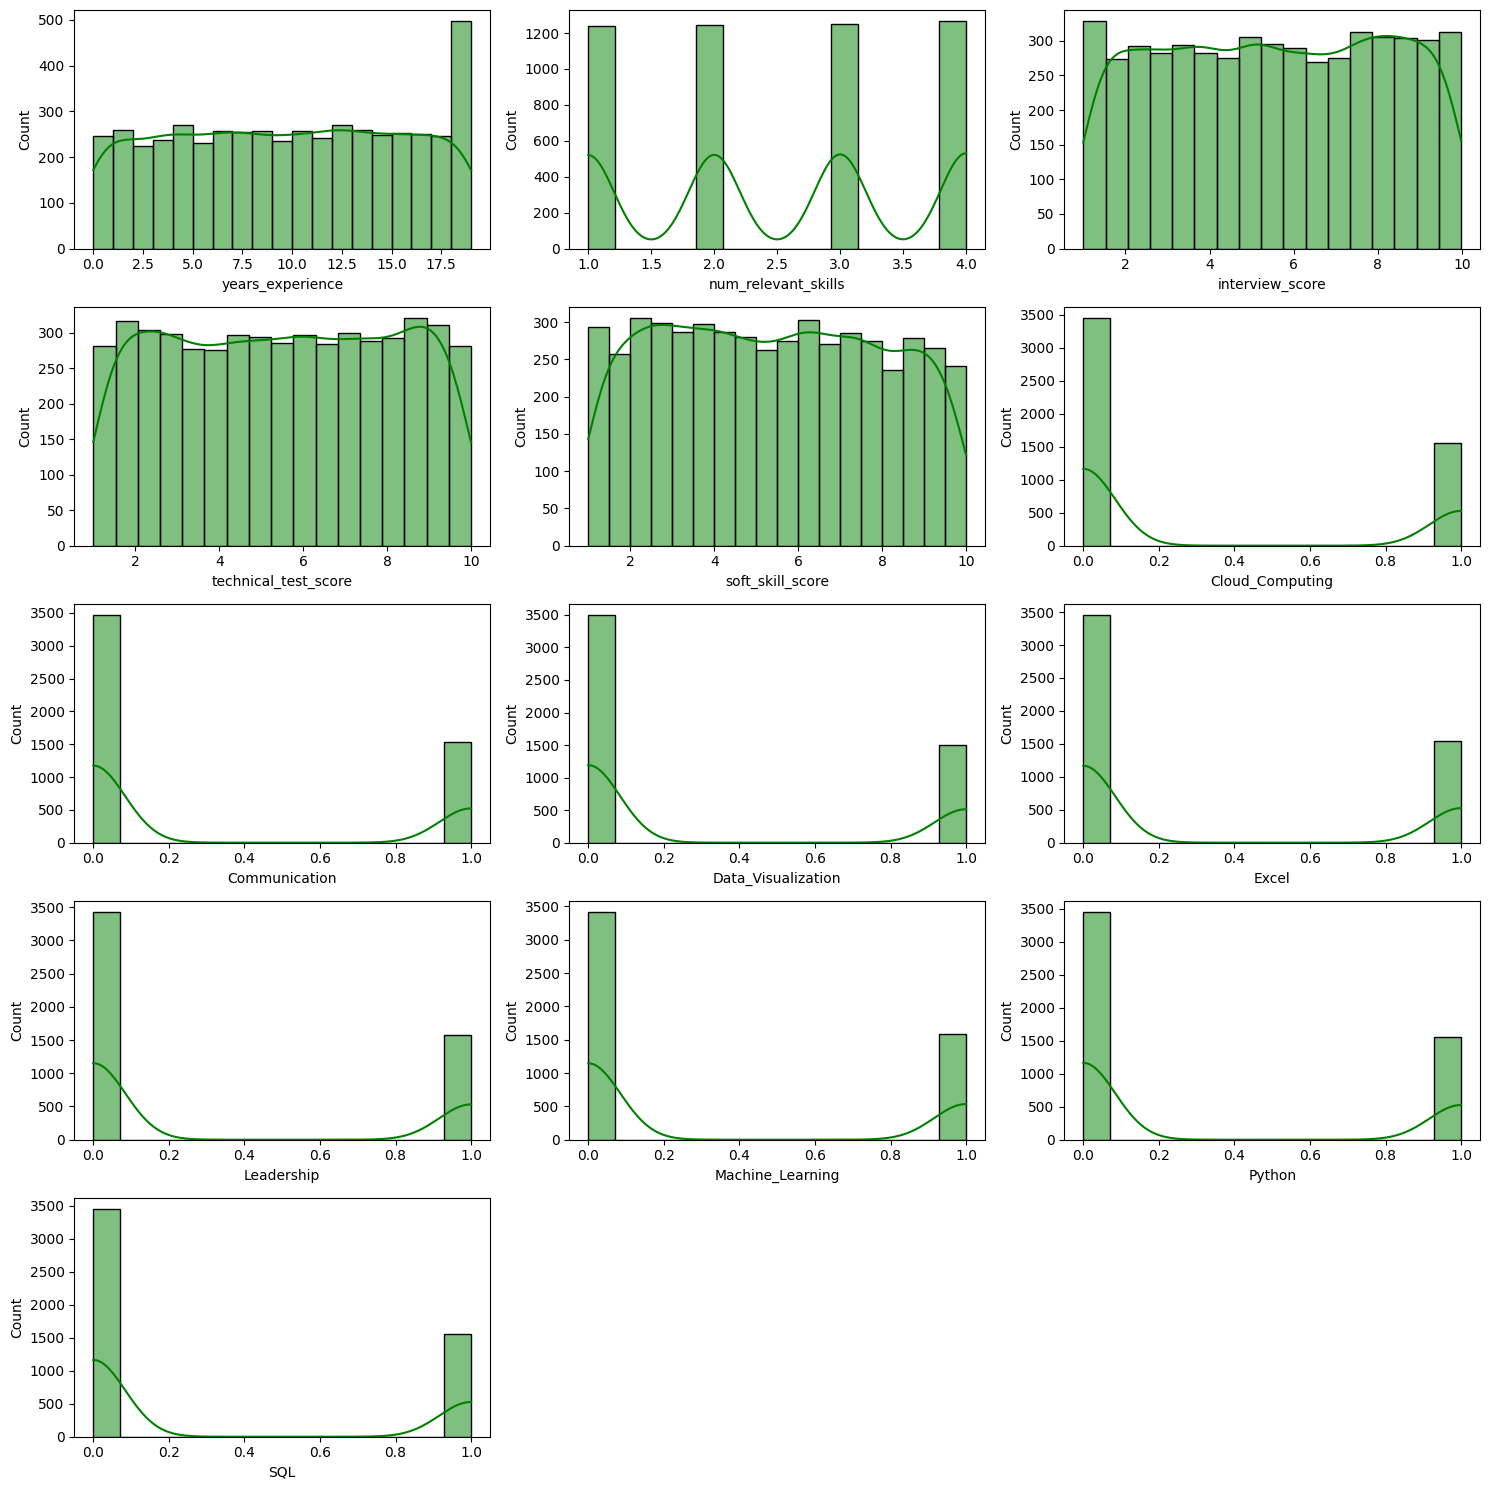

In [ ]:
import math

cols = 3
rows = math.ceil(len(numerical_features) / cols)
plt.figure(figsize=(cols * 5, rows * 3))

for i in range(len(numerical_features)):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[numerical_features[i]], kde=True, color='green')
    plt.title('')

plt.tight_layout()
plt.show()


Sebagian besar variabel seperti nilai wawancara, nilai tes teknikal, dan nilai soft skill tampak terdistribusi relatif merata, yang menunjukkan tidak ada dominasi skor tertentu dalam dataset. Namun, variabel num_relevant_skills menunjukkan pola yang sangat tersegmentasi pada angka bulat dari 1 hingga 4, menandakan data kategorikal atau pembulatan eksplisit. Sementara itu, years_experience menunjukkan puncak tajam di ujung kanan (19 tahun), yang bisa menandakan outlier atau pengelompokan usia kerja yang spesifik. Secara keseluruhan, data ini menunjukkan keberagaman skor dalam proses seleksi.

### Violin Plot

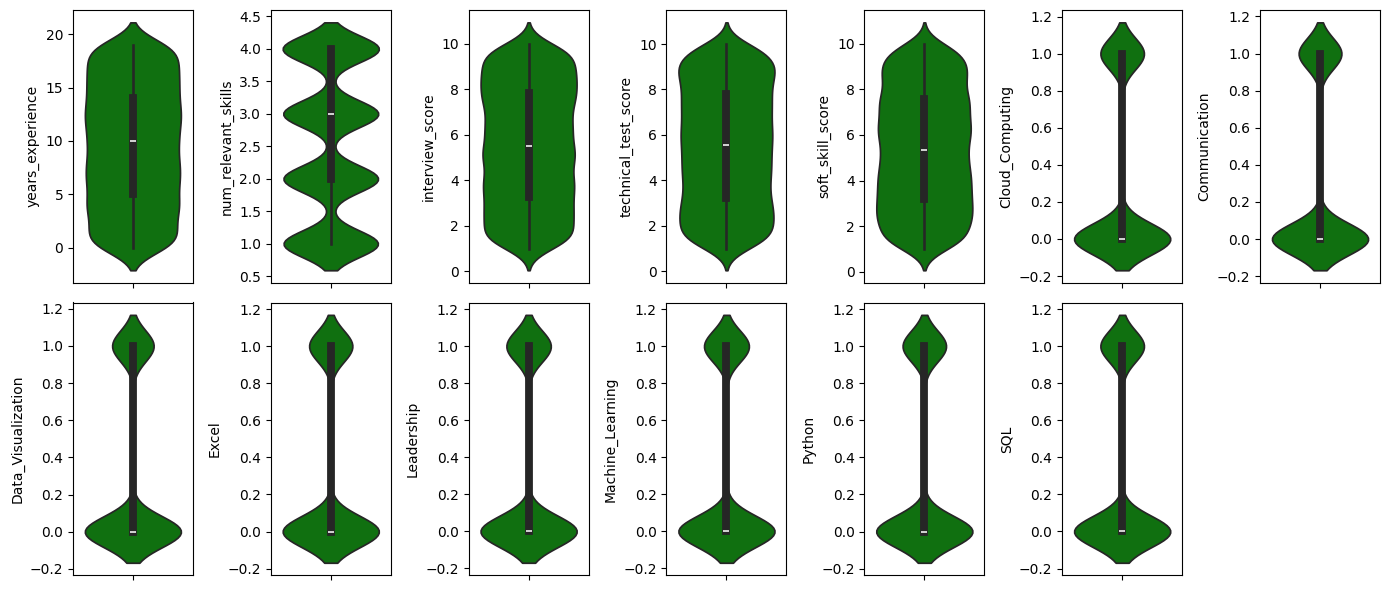

In [ ]:
cols = 7
rows = math.ceil(len(numerical_features) / cols)
plt.figure(figsize=(cols * 2, rows * 3))

for i in range(0, len(numerical_features)):
    plt.subplot(rows, cols, i + 1)
    sns.violinplot(y=df[numerical_features[i]], color='green', orient='v')
    plt.tight_layout()

Diagram violin ini memberikan gambaran distribusi dan kepadatan data dari lima variabel utama dalam proses rekrutmen. Untuk variabel years_experience, distribusinya cukup merata namun dengan kepadatan yang sedikit lebih tinggi di tengah (sekitar 10 tahun), menunjukkan mayoritas kandidat memiliki pengalaman menengah. Variabel num_relevant_skills memperlihatkan distribusi diskret dengan puncak pada setiap nilai integer dari 1 hingga 4, mengonfirmasi bahwa ini adalah variabel kategorikal. Sementara itu, interview_score, technical_test_score, dan soft_skill_score menunjukkan distribusi yang simetris dengan kepadatan tinggi di skor menengah hingga tinggi, mengindikasikan bahwa sebagian besar kandidat memiliki performa baik dalam ketiga aspek tersebut. Bentuk violin yang cenderung simetris pada tiga variabel ini juga menunjukkan tidak adanya bias ekstrem dalam penilaian.

## Counplot feature numerikal

## Count plot feature kategorikal

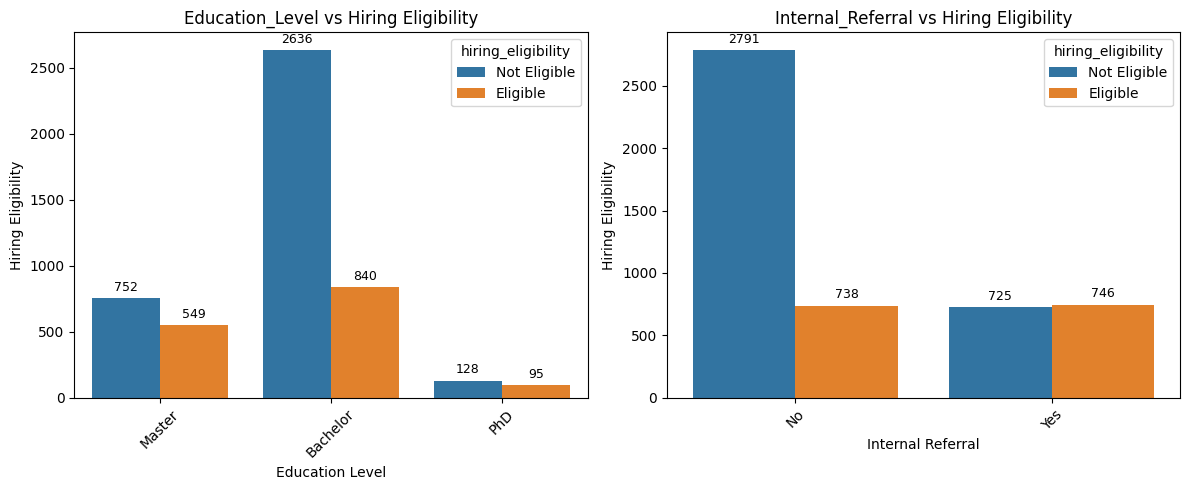

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil fitur kategorikal (kecuali target)
categorical_feature = df.select_dtypes(include='object').columns.drop('hiring_eligibility')
num_features = len(categorical_feature)

# Setup subplots: 1 row, n kolom
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(6*num_features, 5))

# Jika hanya 1 fitur, bungkus axis jadi list agar tetap iterable
if num_features == 1:
    axes = [axes]

# Loop tiap fitur kategorikal
for ax, col in zip(axes, categorical_feature):
    # Untuk fitur dengan banyak kategori (contohnya 'skills')
    if df[col].nunique() > 20:
        top_values = df[col].value_counts().nlargest(10).index
        plot_data = df[df[col].isin(top_values)]
    else:
        plot_data = df

    # Buat plot dan simpan objek bar-nya
    barplot = sns.countplot(x=col, hue='hiring_eligibility', data=plot_data, ax=ax)

    # Tambahkan label jumlah di atas tiap batang
    for container in barplot.containers:
        barplot.bar_label(container, fontsize=9, padding=3)

    ax.set_title(f'{col.title()} vs Hiring Eligibility')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel('Hiring Eligibility')  # Ubah label Y
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


1) Education Level vs Hiring Eligibility
* Bachelor adalah jenjang pendidikan paling dominan not eligible yaitu 2636 , namun mayoritas  memenuhi syarat (Eligible) berjumlah 840.

* Master memiliki karena jumlah yang not eligble yaitu 752 dan jumlah eligible yaitu 549 dengan selisih 203.

* PhD sedikit jumlahnya, tetapi proporsi antara pelamar yang Eligible dan Not Eligible hampir sama yaitu 33.

* Tingkat pendidikan yang lebih tinggi (Master dan PhD) berkorelasi positif dengan peluang lolos seleksi. Namun, lulusan Bachelor mendominasi total pelamar.

2) Internal Referral vs Hiring Eligibility
* Kandidat tanpa referral (No) didominasi oleh status Not Eligible dengan angka 2791 dan eligible dengan angka 738.

* Kandidat dengan internal referral memiliki jumlah Eligible dan Not Eligible yang hampir sama, bahkan cenderung sedikit lebih banyak yang Eligible dengan selish hanya 21.

* Internal referral kemungkinan dapat meningkatkan kandidat lolos karena jumlah eligble lebih banyak dari jumlah yang not eligible.



In [ ]:
df_split.describe()

,Cloud Computing,Communication,Data Visualization,Excel,Leadership,Machine Learning,Python,SQL
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.311400,0.307800,0.301600,0.310000,0.31580,0.318200,0.311000,0.311600
std,0.463112,0.461629,0.458998,0.462539,0.46488,0.465824,0.462949,0.463194
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


###Korelasi antar feature dan label target

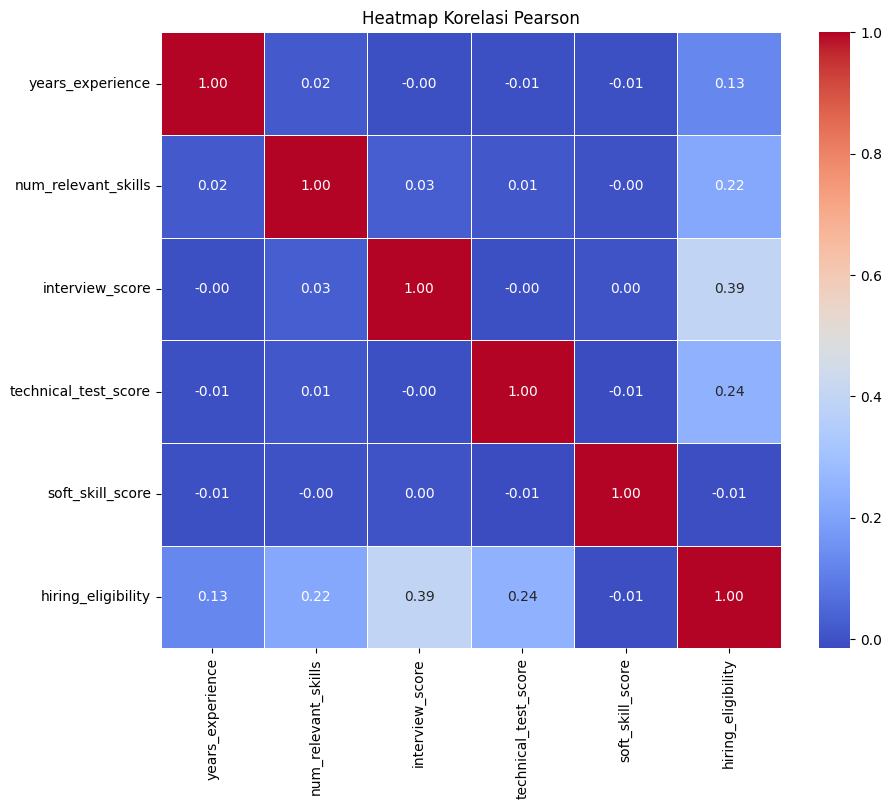

In [ ]:
#Membuat Heatmap
#Encode label target untuk melihat korelasi dengan feature
from sklearn.preprocessing import LabelEncoder

df['hiring_eligibility'] = df['hiring_eligibility'].map({'Eligible': 1, 'Not Eligible': 0})

#inisiasi
numerical = ['years_experience', 'num_relevant_skills', 'interview_score', 'technical_test_score', 'soft_skill_score','hiring_eligibility']
# Hitung matriks korelasi Pearson
df_numeric = df[numerical]
correlation_matrix = df_numeric.corr(method='pearson')

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Pearson")
plt.show()

Berdasarkan heatmap korelasi Pearson di atas, variabel yang paling berpengaruh terhadap hiring_eligibility adalah interview_score (0.39), diikuti oleh technical_test_score (0.24) dan num_relevant_skills (0.22), yang menunjukkan bahwa performa wawancara dan kemampuan teknis memiliki peran penting dalam menentukan kelayakan perekrutan.

Sementara itu, years_experience hanya memiliki korelasi lemah (0.13) dan soft_skill_score bahkan menunjukkan korelasi negatif kecil (-0.01), mengindikasikan bahwa pengalaman kerja dan kemampuan interpersonal tidak terlalu menentukan dalam proses seleksi ini. Secara keseluruhan, perusahaan tampaknya lebih mengutamakan performa teknis dan wawancara dibanding faktor pengalaman atau soft skill dalam menilai kelayakan kandidat

#Feature Encoding

In [ ]:

for col in categorical_features:
  print(f'Value count kolom {col}:')
  print(df[col].value_counts())
  print('---'*10, '/n')

Value count kolom education_level:
education_level
Bachelor    3476
Master      1301
PhD          223
Name: count, dtype: int64
------------------------------ /n
Value count kolom internal_referral:
internal_referral
No     3529
Yes    1471
Name: count, dtype: int64
------------------------------ /n
Value count kolom hiring_eligibility:
hiring_eligibility
0    3516
1    1484
Name: count, dtype: int64
------------------------------ /n


Terlihat dari kolom categorical internal_referral, education_level dilakukan label encode. Sementara kolom skills dilakukan MultiLabelBinarizer dari Scikit-learn

In [ ]:
#label Encode colom target yaitu internal_referral, education_level
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internal_referral'] = df['internal_referral'].map({'Yes': 1, 'No': 0})
df['education_level'] = df['education_level'].map({
    'Bachelor': 0,
    'Master': 1,
    'PhD': 2
})


In [ ]:
#Encode Hiring_eligible
#df['hiring_eligibility'] = df['hiring_eligibility'].map({'Eligible': 1, 'Not Eligible': 0})

In [ ]:
#Cek hasil
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   candidate_id          5000 non-null   int64  
 1   job_id                5000 non-null   int64  
 2   education_level       5000 non-null   int64  
 3   years_experience      5000 non-null   int64  
 4   num_relevant_skills   5000 non-null   int64  
 5   internal_referral     5000 non-null   int64  
 6   interview_score       5000 non-null   float64
 7   technical_test_score  5000 non-null   float64
 8   soft_skill_score      5000 non-null   float64
 9   hiring_eligibility    5000 non-null   int64  
 10  Cloud_Computing       5000 non-null   int64  
 11  Communication         5000 non-null   int64  
 12  Data_Visualization    5000 non-null   int64  
 13  Excel                 5000 non-null   int64  
 14  Leadership            5000 non-null   int64  
 15  Machine_Learning     

In [ ]:
df.sample(10)

,candidate_id,job_id,education_level,years_experience,num_relevant_skills,internal_referral,interview_score,technical_test_score,soft_skill_score,hiring_eligibility,Cloud_Computing,Communication,Data_Visualization,Excel,Leadership,Machine_Learning,Python,SQL
4998,4999,1441,1,8,1,0,4.88,8.92,5.83,0,1,0,1,1,0,1,0,0
3029,3030,4436,0,16,4,1,5.89,6.42,2.02,0,0,0,0,1,1,1,1,0
33,34,1990,0,16,3,1,4.22,7.81,6.27,1,1,0,0,1,0,0,0,0
729,730,3053,0,4,1,0,3.56,1.46,1.94,0,0,1,1,0,0,1,0,0
2814,2815,4399,0,12,2,0,2.53,3.13,2.38,0,0,0,0,0,0,1,0,0
3150,3151,447,1,19,3,0,1.76,3.73,7.52,0,0,0,1,0,0,0,0,1
3233,3234,281,0,8,2,0,4.36,8.79,2.74,0,0,1,0,0,0,1,1,0
2764,2765,4209,0,12,2,0,7.06,5.04,5.07,0,0,0,0,0,0,1,0,0
2473,2474,2023,0,7,4,1,6.18,7.81,8.56,1,1,1,0,0,1,0,0,0
2647,2648,588,0,11,2,0,9.67,2.00,3.13,0,1,0,1,0,0,0,0,0


#Feature Extraction/Engineering

In [ ]:
#Menambah kolom total skill
df['total_skills'] = df[['Cloud_Computing', 'Communication', 'Data_Visualization', 'Excel',
                         'Leadership', 'Machine_Learning', 'Python', 'SQL']].sum(axis=1)

# Avg Test skor
df['avg_test_score'] = df[['interview_score', 'technical_test_score', 'soft_skill_score']].mean(axis=1)

#Experience-Education Interaction, Kandidat dengan pendidikan tinggi dan pengalaman luas kemungkinan besar lebih eligible
df['edu_exp_score'] = df['education_level'] * df['years_experience']


Fitur tambahan yang digunakan untuk menambah analisis data yaitu total skill, rata-rata test score, dan education-experience score. Perkalian antar kolom yang diduga saling berhubungan dalam membuat fitur engineering membantu mengamplifikasi nilai ketika keduanya tinggi — dan membuat nilai kecil saat salah satu rendah (yang logis karena dua faktor tersebut harus sama-sama kuat untuk hasil optimal).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   candidate_id          5000 non-null   int64  
 1   job_id                5000 non-null   int64  
 2   education_level       5000 non-null   int64  
 3   years_experience      5000 non-null   int64  
 4   num_relevant_skills   5000 non-null   int64  
 5   internal_referral     5000 non-null   int64  
 6   interview_score       5000 non-null   float64
 7   technical_test_score  5000 non-null   float64
 8   soft_skill_score      5000 non-null   float64
 9   hiring_eligibility    5000 non-null   int64  
 10  Cloud_Computing       5000 non-null   int64  
 11  Communication         5000 non-null   int64  
 12  Data_Visualization    5000 non-null   int64  
 13  Excel                 5000 non-null   int64  
 14  Leadership            5000 non-null   int64  
 15  Machine_Learning     

#Feature Selection

Metode yang digunakan untuk feature selection yaitu chi-square test karena menggunakan jenis model supervised learning dengan label target kategorical (hiring_eligibility)

In [ ]:
#Menggunakan Metode chi-square test
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=['hiring_eligibility','candidate_id', 'job_id'])
y = df['hiring_eligibility']

# Pastikan semua fitur non-negatif untuk chi2
X_scaled = MinMaxScaler().fit_transform(X.select_dtypes(include=['int64', 'bool', 'float64']))

chi_scores = chi2(X_scaled, y)
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores[0]})
print(chi2_df.sort_values(by='Chi2 Score', ascending=False))


                 Feature  Chi2 Score
3      internal_referral  311.821029
4        interview_score  131.198724
0        education_level   66.667430
17         edu_exp_score   65.654953
2    num_relevant_skills   64.884278
5   technical_test_score   49.978950
16        avg_test_score   41.409921
1       years_experience   14.330910
14                   SQL    3.231214
10                 Excel    1.358026
11            Leadership    1.022068
13                Python    0.941046
12      Machine_Learning    0.378360
7        Cloud_Computing    0.242789
15          total_skills    0.153077
9     Data_Visualization    0.131185
6       soft_skill_score    0.054509
8          Communication    0.009811


:Hasil Chi-Square test menunjukkan seberapa besar pengaruh (hubungan statistik) masing-masing fitur terhadap variabel target hiring_eligibility secara univariat (satu fitur vs target, tanpa mempertimbangkan korelasi antar fitur). Nilai paling rendah dibawah 0,1 yaitu softskill_skor. untuk skill_communication meskipun skornya kecil namun tetap di keep karena merupakan pecahan dari kolom skills yang termasuk fitur penting dalam prediksi kandidat.

#Melakukan drop kolom yang tidak dibutuhkan

Berdasarkan analisis maka kita akan melakukan drop kolom jenis id dan softskill

In [ ]:
#Melakukan drop kolom yang tidak dibutuhkan yaitu candidate_id, job_id, soft_skill_score, communication
df_proses = df.drop(columns=['candidate_id', 'job_id', 'soft_skill_score'])


In [ ]:
#Cek hasil
df_proses.head()

,education_level,years_experience,num_relevant_skills,internal_referral,interview_score,technical_test_score,hiring_eligibility,Cloud_Computing,Communication,Data_Visualization,Excel,Leadership,Machine_Learning,Python,SQL,total_skills,avg_test_score,edu_exp_score
0,1,17,2,0,1.47,5.53,0,1,0,0,0,0,0,1,0,2,4.766667,17
1,0,19,3,0,8.46,7.27,1,0,0,0,0,1,1,0,0,2,7.766667,0
2,0,6,3,1,8.62,6.88,1,0,0,1,0,0,0,1,1,3,6.990000,0
3,1,1,4,0,7.78,1.07,0,0,0,1,0,0,0,0,1,2,5.796667,1
4,0,9,3,1,7.94,1.75,1,0,1,0,1,0,0,1,0,3,4.673333,0


In [ ]:
df_proses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education_level       5000 non-null   int64  
 1   years_experience      5000 non-null   int64  
 2   num_relevant_skills   5000 non-null   int64  
 3   internal_referral     5000 non-null   int64  
 4   interview_score       5000 non-null   float64
 5   technical_test_score  5000 non-null   float64
 6   hiring_eligibility    5000 non-null   int64  
 7   Cloud_Computing       5000 non-null   int64  
 8   Communication         5000 non-null   int64  
 9   Data_Visualization    5000 non-null   int64  
 10  Excel                 5000 non-null   int64  
 11  Leadership            5000 non-null   int64  
 12  Machine_Learning      5000 non-null   int64  
 13  Python                5000 non-null   int64  
 14  SQL                   5000 non-null   int64  
 15  total_skills         

#Data Splitting dan Scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df_proses.drop(columns=['hiring_eligibility'])
y = df_proses['hiring_eligibility']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Periksa banyak data masing-masing
print(f'Banyak data latih = {X_train.shape[0]}')
print(f'Banyak data test  = {X_test.shape[0]}')

Banyak data latih = 4000
Banyak data test  = 1000


#Handling Imbalance

In [ ]:
#Handling imbalance pada data train
print(f'Jumlah Candidate yang eligible = {y_train.value_counts()[1]}')
print(f'Jumlah Candidate yang Non Eligible = {y_train.value_counts()[0]}')

Jumlah Candidate yang eligible = 1167
Jumlah Candidate yang Non Eligible = 2833


Terlihat data belum balance karena kelompok eligible lebih besar dibanding Non eligible meskipun tidak berbeda signifikan. Maka dari itu dilakukan SMOTE untuk handling imbalance

In [ ]:
# SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Cek proporsi setelah SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: hiring_eligibility
0    2833
1    1167
Name: count, dtype: int64
After SMOTE: hiring_eligibility
1    2833
0    2833
Name: count, dtype: int64


Untuk handlin imbalance digunakan metode SMOTE (Synthetic Minority Over-sampling Technique) yaitu Membuat data sintetis (buatan) dari kelas minoritas sehingga data menjadi seimbang. Oversampling dipilih karena data dibawah 5000 dan perbedaan data sedikit sehingga agar tidak mengurangi jumlah data lebih baik menambah kelas minoritasnya.

In [ ]:
#Hasil akhir Data train dan data test yang sudah Process
print(f'Banyak data latih (x) = {X_train_resampled.shape[0]}')
print(f'Banyak data latih (y) = {y_train_resampled.shape[0]}')
print(f'Banyak data test  = {X_test_scaled.shape[0]}')

Banyak data latih (x) = 5666
Banyak data latih (y) = 5666
Banyak data test  = 1000


#Training model & prediksi candidate Eligible sebagai variabel target

##Training Baseline & Alternative Models

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Model yang dipergunakan :
* Logistic Regression : Merupakan model dasar untuk masalah klasifikasi. Model ini cepat untuk dilatih dan mudah diinterpretasi, serta cocok untuk baseline awal sebelum menggunakan model kompleks.
 * Model ini memiliki kelebihan :
   * Interpretable, koefisien menunjukkan pengaruh masing-masing fitur terhadap probabilitas kelas
   * Efisien secara komputasi
   * Baik untuk data linearly separable atau hampir linear
 * Kekurangannya :
   * Tidak bisa menangani hubungan non-linear tanpa transformasi manual
   * Rentan terhadap overfitting jika jumlah fitur > jumlah sampel
   * Kurang performanya dibanding model ensemble pada data dengan pola kompleks
* Random Forest : Merupakan model ensemble dari banyak decision tree. Dimana model ini robust terhadap overfitting dan noise, serta bisa menangani fitur kategorikal dan numerik.
 * Model ini memiliki kelebihan :
   * Dapat menangkap pola non-linear
   * Menyediakan feature importance
   * Tahan terhadap overfitting karena bootstrapping dan averaging
   * Tidak perlu scaling fitur
 * Kekurangannya :
   * Lebih lambat dalam pelatihan dibanding logistic regression
   * Sulit diinterpretasi dibanding model linear
   * Memori lebih besar saat menggunakan banyak pohon
* LightGBM (LGBM) : Salah satu model boosting terbaik untuk kecepatan dan akurasi. Model ini efisien untuk dataset besar (>5000 baris)
 * Model ini memiliki kelebihan :
   * Sangat cepat dan hemat memori
   * Menangani missing value secara otomatis
   * Fitur histogram-based membuatnya efisien
   * Performa sangat baik pada tabular data
 * Kekurangannya :
   * Rentan overfitting jika tidak ditune dengan benar
   * Lebih kompleks dibanding Random Forest
   * Butuh tuning hyperparameter yang teliti
* XGBoost : Salah satu model boosting terpopuler, dan sering digunakan dalam kompetisi ML.
 * Model ini memiliki kelebihan :
   * Regularisasi yang sudah built-in sehingga mengurangi overfitting
   * Dukungan GPU untuk percepatan
   * Banyak parameter tuning fleksibel
   * Performa tinggi pada data tabular
 * Kekurangannya :
   * Lebih lambat daripada LightGBM
   * Perlu waktu tuning hyperparameter yang cukup
   * Lebih kompleks untuk interpretasi
* CatBoost : Model ini dirancang untuk menangani fitur kategorikal dengan baik. Dimana model otomatis melakukan encoding pada variabel kategorikal.
 * Model ini memiliki kelebihan :
   * Handling kategori otomatis (cocok untuk education_level, internal_referral)
   * Hasil biasanya stabil dan bagus
   * Mudah digunakan tanpa preprocessing tambahan
 * Kekurangannya :
   * Kadang lebih lambat daripada LGBM/XGBoost
   * Lebih sedikit dokumentasi dibanding XGBoost
* AdaBoost : Model boosting awal yang masih relevan untuk beberapa kasus. Model ini sederhana dan mudah dimengerti.
 * Model ini memiliki kelebihan :
   * Kuat untuk data bersih dan terstruktur
   * Menggunakan weak learners (biasanya decision stumps) dan meningkatkan fokus pada kesalahan
 * Kekurangannya :
   * Rentan terhadap noise dan outlier
   * Tidak sekuat model boosting modern (XGBoost, LGBM)
   * Lambat konvergensi
* Ensemble (Voting) : Model ini menggabungkan prediksi dari beberapa model. Dimana meningkatkan robustness dan akurasi melalui diversifikasi.
 * Model ini memiliki kelebihan :
   * Menggabungkan kekuatan berbagai model
   * Reduksi risiko overfitting pada satu model tertentu
   * Bisa menggunakan hard voting (mode class) atau soft voting (probabilitas rata-rata)
 * Kekurangannya :
   * Lebih lambat karena harus menjalankan beberapa model
   * Membutuhkan manajemen model yang baik
   * Jika semua model buruk, hasil ensemble juga bisa buruk

In [ ]:
#Stage 2
#prediction
#Logistic Regression model
# Import Library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
import numpy as np  # Tambahkan numpy untuk sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar Model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Ensemble(Voting)": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('rf', RandomForestClassifier(random_state=42)),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
        ],
        voting='soft'
    )
}

# Loop untuk melatih dan mengevaluasi semua model
results = {}

for name, model in models.items():
    print(f"\n{'='*60}\n{name}:\n{'='*60}")

    # Training
    model.fit(X_train_resampled, y_train_resampled)

    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Evaluasi
#    print("Accuracy:", accuracy_score(y_test, y_pred))
#    print(classification_report(y_test, y_pred))

    #Root Mean Squared Error (RMSE), R-squared (R²)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Hitung RMSE dari MSE
    r2 = r2_score(y_test, y_pred)

#    print("Logistic Regression Results:")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")

    # Simpan hasil
    results[name] = {
        'rmse': rmse,
        'r2': r2
    }


Logistic Regression:
Root Mean Squared Error (RMSE): 0.44
R-squared (R²): 0.09

Random Forest:
Root Mean Squared Error (RMSE): 0.09
R-squared (R²): 0.96

LGBM:
[LightGBM] [Info] Number of positive: 2833, number of negative: 2833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 5666, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Root Mean Squared Error (RMSE): 0.04
R-squared (R²): 0.99

XGBoost:
Root Mean Squared Error (RMSE): 0.04
R-squared (R²): 0.99

CatBoost:
Root Mean Squared Error (RMSE): 0.04
R-squared (R²): 0.99

AdaBoost:
Root Mean Squared Error (RMSE): 0.41
R-squared (R²): 0.24


Dari evaluasi RMSE dan R² terlihat bahwa:
* Model yang yang paling baik adalah LGBM, XGBoost, CatBoost dengan nilai RMSE 0.04 dan R² 0.99. Diikuti oleh model Ensemble (Voting) yang sedikit dibawahnya dengan nilai RMSE 0.05 dan R² 0.99.
* Model berikutnya yang cukup baik hasilnya adalah Random Forest dengan nilai RMSE 0.09 dan R² 0.96.
* Ke-5 model ini memiliki akurasi yang tinggi dan dapat mengenali pola yang kompleks
* Sedangkan model Logistic Regression dan AdaBoost memiliki akurasi yang cukup rendah dan kurang dapat mengenali pola yang kompleks. Hal ini terlihat dari nilai masing-masing RMSE=0.44 R²=0.09, dan RMSE=0.41 R²=0.24

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, KFold

def eval_classification(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_resampled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_resampled)

    print("===Train Set===")
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train_resampled, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(y_train_resampled, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(y_train_resampled, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train_resampled, y_pred_train))

    print("===Test Set===")
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("===ROC-AUC===")
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))
    #
    # cv di hitung dari kfold
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    score = cross_validate(model, X, y, cv=kfold, scoring='roc_auc', return_train_score=True)
#    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())


Logistic Regression:
===Train Set===
Accuracy (Train Set): 0.81
Precision (Train Set): 0.80
Recall (Train Set): 0.82
F1-Score (Train Set): 0.81
===Test Set===
Accuracy (Test Set): 0.80
Precision (Test Set): 0.65
Recall (Test Set): 0.81
F1-Score (Test Set): 0.72
===ROC-AUC===
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.8941607553747272
roc_auc (crossval test): 0.8917443954819444


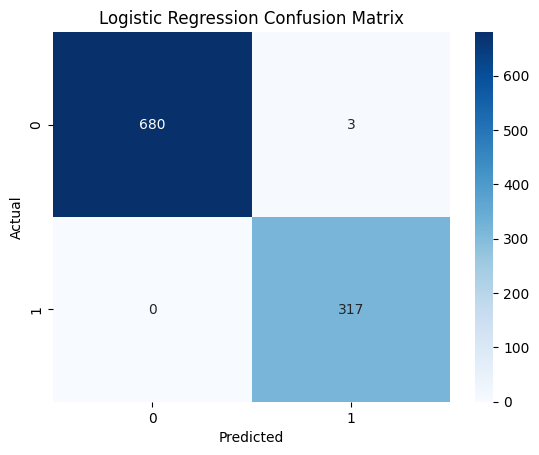


Random Forest:
===Train Set===
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
===Test Set===
Accuracy (Test Set): 0.99
Precision (Test Set): 0.99
Recall (Test Set): 0.98
F1-Score (Test Set): 0.99
===ROC-AUC===
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9999648619709101


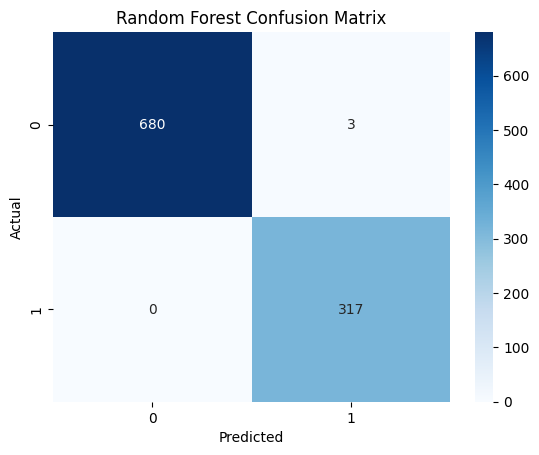


LGBM:
===Train Set===
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
===Test Set===
Accuracy (Test Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
===ROC-AUC===
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
[LightGBM] [Info] Number of positive: 1167, number of negative: 2833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291750 -> initscore=-0.886900
[LightGBM] [Info] Start training from score -0.886900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

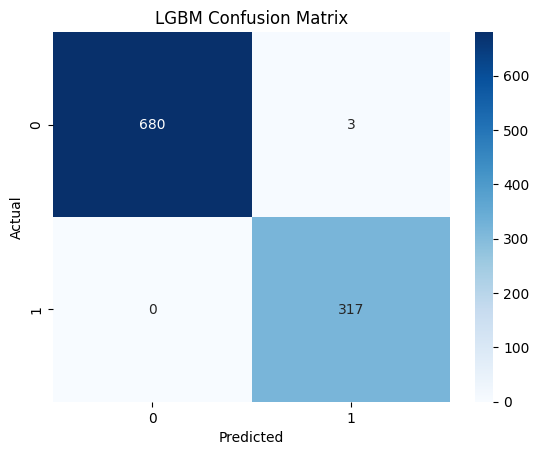


XGBoost:
===Train Set===
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
===Test Set===
Accuracy (Test Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
===ROC-AUC===
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9999463077855679


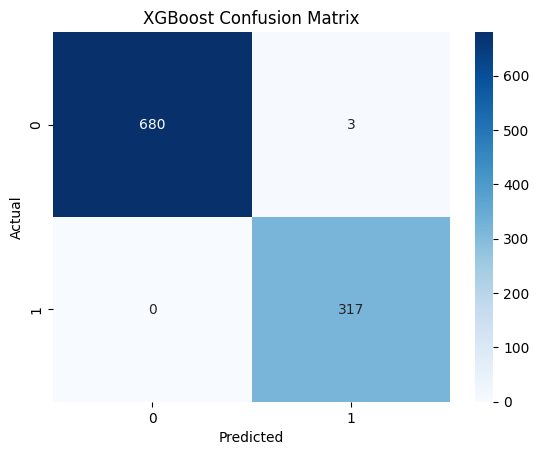


CatBoost:
===Train Set===
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
===Test Set===
Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
===ROC-AUC===
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9999942770270543


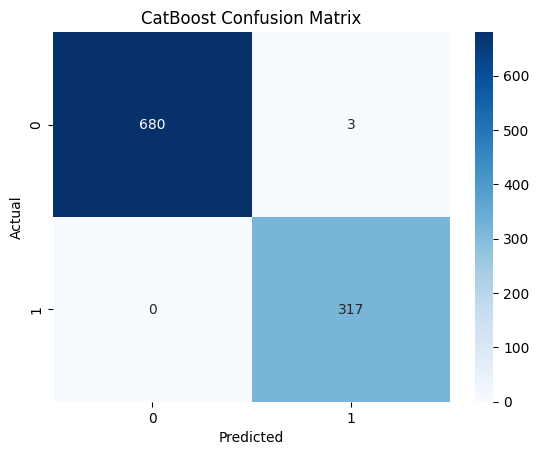


AdaBoost:
===Train Set===
Accuracy (Train Set): 0.86
Precision (Train Set): 0.86
Recall (Train Set): 0.87
F1-Score (Train Set): 0.86
===Test Set===
Accuracy (Test Set): 0.83
Precision (Test Set): 0.71
Recall (Test Set): 0.81
F1-Score (Test Set): 0.76
===ROC-AUC===
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.95
roc_auc (crossval train): 0.9449861797801311
roc_auc (crossval test): 0.9419903807406564


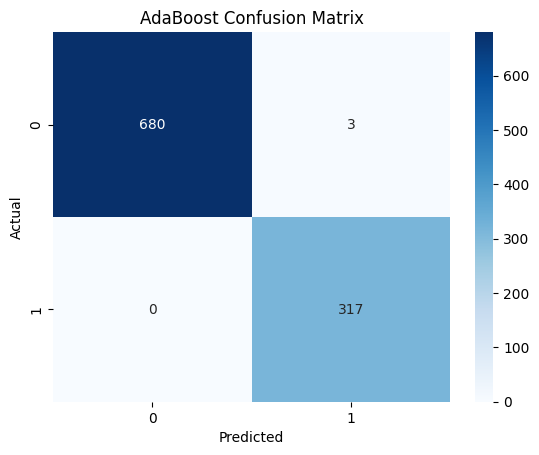


Ensemble(Voting):
===Train Set===
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
===Test Set===
Accuracy (Test Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
===ROC-AUC===
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9997850517144611


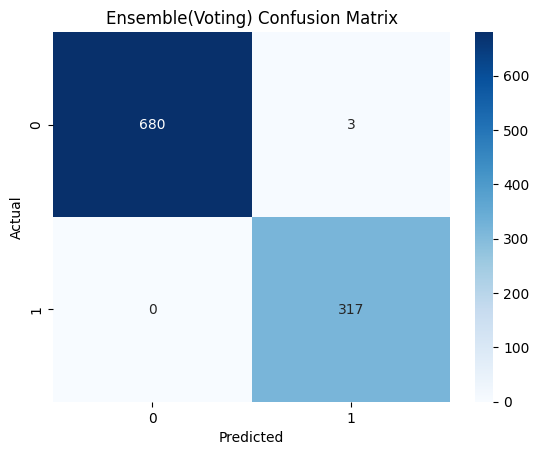

In [ ]:
#Stage 3
#evaluation
#Model dievaluasi dengan metrik yang sesuai dengan tipe permasalahan (accuracy, precision, recall, F1-score, MSE, dll.).
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    print(f"\n{'='*60}\n{name}:\n{'='*60}")

    # Training
#    model.fit(X_train_resampled, y_train_resampled)

    # Prediksi
#    y_pred = model.predict(X_test_scaled)

    # Evaluasi
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

    eval_classification(model)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Simpan hasil
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }



Goals yang ingin dicapai diantaranya menjaga agar false positif dan false negatif terjaga sehingga talent yang bagus tetap dapat terekrut dan talent yang buruk tidak dipilih, maka yang perlu diperhatikan adalah parameter F1-Score.<br>
Berdasarkan evaluasi F1-Score dan Confussion Matrix:
* Logistic Regression
 * F1-score = 0.72 , ROC-AUC = 0.89
 * Masih memiliki gap signifikan antara precision (0.65) dan recall (0.81)
 * Recall tinggi artinya mampu menangkap banyak calon eligible
 * Precision rendah artinya banyak false positive (banyak yang diprediksi eligible tapi sebenarnya tidak)
 * Cukup untuk baseline, tapi tidak cukup presisi untuk deployment.
* AdaBoost
 * F1-score = 0.76 , ROC-AUC = 0.94
 * Lebih baik dari Logistic Regression
 * Masih ada gap antara precision (0.71) dan recall (0.81)
 * ROC-AUC cukup tinggi, dimana bagus dalam membedakan kelas
 * Model lebih baik dari Logistic Regression, tapi masih kalah dibanding model boosting modern
* Random Forest
 * F1-score = 0.99 , ROC-AUC = 1.00
 * Precision = 0.99, Recall = 0.98 dimana hal ini sangat seimbang
 * Akurasi dan semua metrik sangat tinggi
 * Model sangat stabil dan akurat, cocok untuk produksi jika kecepatan bukan masalah utama
* Semua model Ensemble (LGBM, XGBoost, CatBoost, Voting) memiliki:
 * F1-score = 1.00 atau hampir 1.00
 * ROC-AUC = 1.00
 * Kondisi ini menunjukkan bahwa model Ensemble tidak melewatkan satupun kasus "Eligible" (Recall = 1) dan presisi juga sangat tinggi. <br>Hal ini terkonfirmasi dari confussion matrix, dimana tidak ingin melewatkan calon yang layak (False Negative = 0) dan juga tidak ingin merekrut orang yang tidak layak (False Positive sangat rendah, hanya 3)
 * Meskipun train score = 1.00 dan test score juga sangat tinggi, tidak ada indikasi overfitting nyata karena:
   * ROC-AUC cross-validation juga sangat tinggi (>0.99)
   * Tidak ada gap besar antara train dan test metrics
   * F1-score test juga sangat tinggi
 * Untuk akurasi maksimal, dan stabilitas bisa memilih model Ensemble Voting


##Baseline & Alternative Models Hyperparameter Tuning
Untuk setiap Model, parameter yang di tuning adalah :
* Logistic Regression
 * parameter C merupakan Inverse of regularization strength. Nilai dibuat kecil agar lebih kuat regularisasi, untuk menghindari overfitting.
 * penalty untuk mengatur jenis regulasi yang dipergunakan. Dalam hal ini yang dipergunakan Lasso (11) dan Ridge regularization (12).
 * solver merupakan algoritma optimisasi yang dipergunakan. Dimana liblinear cocok untuk dataset kecil dan bisa digunakan dengan penalty 11/12.
* Random Forest
 * n_estimators untuk menentukan jumlah pohon (trees) di dalam forest.
Semakin banyak biasanya semakin baik akurasi, tapi lebih lambat.
 * max_depth untuk menentukan kedalaman maksimum dari pohon.
Nilai None membuat node akan di-split sampai semua daun pure atau sesuai min_samples_split. Penentuan Depth yang terbatas akan mengurangi overfitting.
 * min_samples_split untuk menentukan jumlah minimum sampel yang dibutuhkan untuk membagi sebuah node internal. Semakin tinggi nilai dapat mengurangi overfitting.
* LGBM
 * num_leaves menentukan jumlah maksimum leaf dalam pohon. Lebih banyak leaves akan membuat model lebih kompleks dan bisa overfit.
 * max_depth menentukan batas kedalaman pohon. Membatasi depth dapat mengurangi overfitting.
 * learning_rate menentukan ukuran langkah per pembaruan pohon. Nilai kecil akan membuat model lebih stabil tetapi butuh lebih banyak iterasi.
 * n_estimators menentukan jumlah boosting iterations (jumlah pohon). Bisa meningkatkan akurasi tapi juga risiko overfitting jika terlalu banyak.
* XGBoost
 * learning_rate untuk mengontrol seberapa cepat model belajar. Learning rate rendah maka model lebih presisi tapi butuh lebih banyak iterasi.
 * n_estimators menentukan jumlah boosting rounds (jumlah pohon). Semakin banyak akan membuat model semakin baik akurasi, tapi mungkin overfit.
 * max_depth menentukan kedalaman maksimal pohon. Untuk membatasi kompleksitas model.
 * subsample menentukan fraksi sampel yang digunakan untuk pelatihan tiap tree. Nilai <1.0 akan mengurangi overfitting karena randomisasi.
* CatBoost
 * depth menentukan kedalaman pohon. Mirip dengan max_depth di model lain.Dimana semakin dalam maka model lebih kompleks.
 * learning_rate untuk mengontrol ukuran langkah update saat training. Nilai kecil maka model lebih stabil, dan butuh lebih banyak iterasi.
 * iterations menentukan jumlah boosting iterations (jumlah pohon). Mirip dengan n_estimators.
 * 12_leaf_reg menentukan regularisasi L2 pada daun. Untuk membantu mengurangi overfitting.
* AdaBoost
 * n_estimators menentukan jumlah estimator (weak learners) dalam ensemble. Dimana semakin banyak akan membuat semakin baik performa, tapi lebih lambat.
 * learning_rate merupakan faktor penskalaan untuk bobot prediktor lemah. Nilai kecil akan membuat model lebih konservatif dan stabil.
* Ensemble (Voting)
 * voting untuk menentukan apakah prediksi mempergunakan mayoritas suara (voting=hard), atau prediksi berdasarkan rata-rata probabilitas dari semua model (voting=soft). Memastikan bahwa ensemble benar-benar memanfaatkan strength dari tiap model

In [ ]:
#Stage 2
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, uniform
import numpy as np
import time

param_grids = {
    "Logistic Regression": {
        'C': uniform(0.001, 100),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },

    "Random Forest": {
        'n_estimators': randint(50, 300),
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': randint(2, 11)
    },

    "LGBM": {
        'num_leaves': randint(20, 200),
        'max_depth': [-1, 5, 10, 15],
        'learning_rate': uniform(0.001, 0.3),
        'n_estimators': randint(50, 300)
    },

    "XGBoost": {
        'learning_rate': uniform(0.01, 0.3),
        'n_estimators': randint(50, 300),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.6, 0.4)
    },

    "CatBoost": {
        'depth': randint(4, 10),
        'learning_rate': uniform(0.01, 0.3),
        'iterations': randint(50, 300),
        'l2_leaf_reg': randint(1, 10)
    },

    "AdaBoost": {
        'n_estimators': randint(50, 300),
        'learning_rate': uniform(0.01, 1.0)
    },

    "Ensemble(Voting)": {
        'voting': ['soft']
    }
}


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
def eval_classification_tuned(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_resampled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_resampled)

    print("===Train Set===")
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train_resampled, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(y_train_resampled, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(y_train_resampled, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train_resampled, y_pred_train))

    print("===Test Set===")
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("===ROC-AUC===")
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))
    #
    # cv di hitung dari kfold
    #kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    kfold=5

    score = cross_validate(model, X, y, cv=kfold, scoring='roc_auc', return_train_score=True)
#    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))


Tuning Logistic Regression
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Waktu eksekusi tuning Logistic Regression: 4.22 detik
Best Params: {'C': np.float64(5.809361216819947), 'penalty': 'l2', 'solver': 'liblinear'}
===Train Set===
Accuracy (Train Set): 0.81
Precision (Train Set): 0.80
Recall (Train Set): 0.82
F1-Score (Train Set): 0.81
===Test Set===
Accuracy (Test Set): 0.80
Precision (Test Set): 0.65
Recall (Test Set): 0.81
F1-Score (Test Set): 0.72
===ROC-AUC===
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.89408599213887
roc_auc (crossval test): 0.8914029441373191
Accuracy: 0.803
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       683
           1       0.65      0.81      0.72       317

    accuracy                           0.80      1000
   macro avg       0.78      0.80      0.78      1000
weighted avg       0.82      0.80      0.81      1000



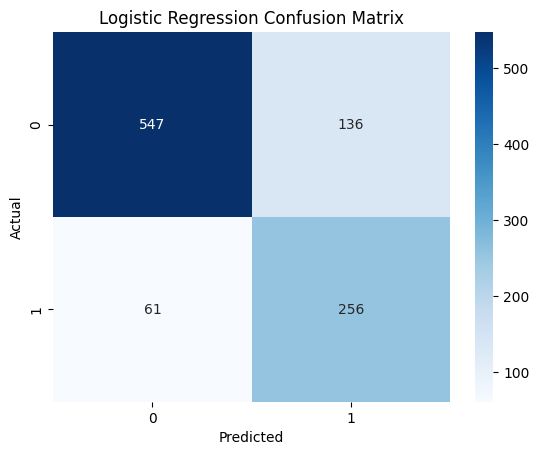


Tuning Random Forest
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Waktu eksekusi tuning Random Forest: 133.58 detik
Best Params: {'max_depth': 15, 'min_samples_split': 6, 'n_estimators': 210}
===Train Set===
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
===Test Set===
Accuracy (Test Set): 0.99
Precision (Test Set): 0.99
Recall (Test Set): 0.99
F1-Score (Test Set): 0.99
===ROC-AUC===
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9999760507367416
Accuracy: 0.994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.99      0.99      0.99       317

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



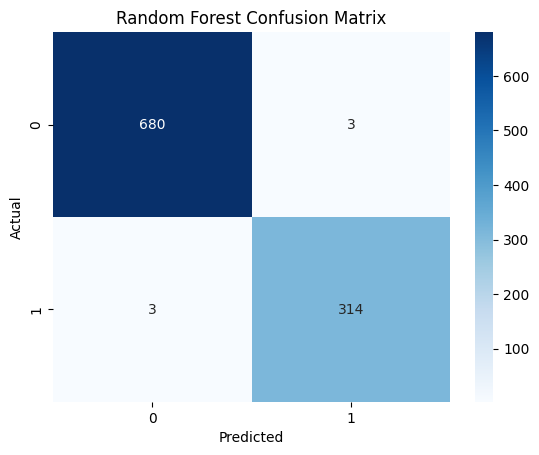


Tuning LGBM
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 2833, number of negative: 2833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 5666, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

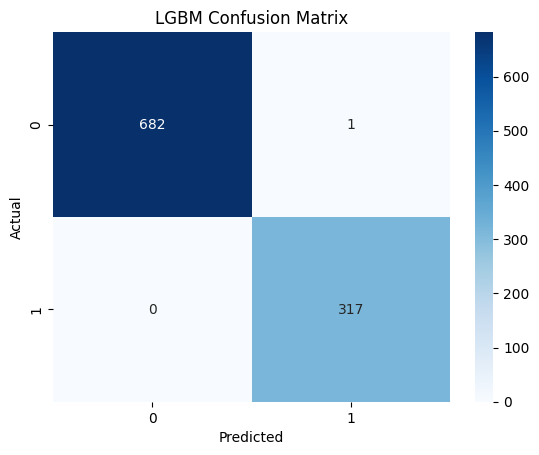


Tuning XGBoost
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Waktu eksekusi tuning XGBoost: 30.76 detik
Best Params: {'learning_rate': np.float64(0.2140922615763339), 'max_depth': 3, 'n_estimators': 216, 'subsample': np.float64(0.6053059844639466)}
===Train Set===
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
===Test Set===
Accuracy (Test Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
===ROC-AUC===
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9999952105215263
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.99      1.00      1.00       317

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



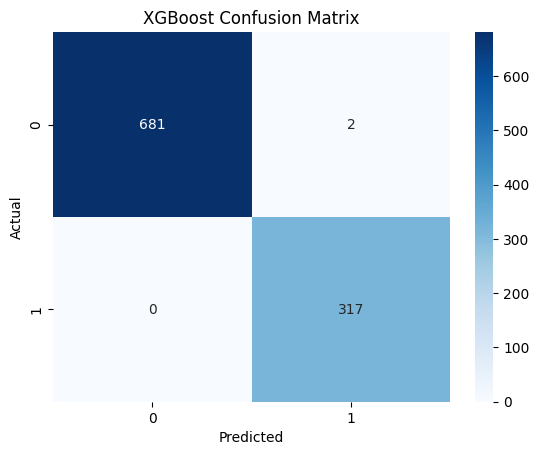


Tuning CatBoost
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Waktu eksekusi tuning CatBoost: 318.37 detik
Best Params: {'depth': 8, 'iterations': 114, 'l2_leaf_reg': 9, 'learning_rate': np.float64(0.3060660809801552)}
===Train Set===
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
===Test Set===
Accuracy (Test Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
===ROC-AUC===
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9999779683990211
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.99      1.00      1.00       317

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



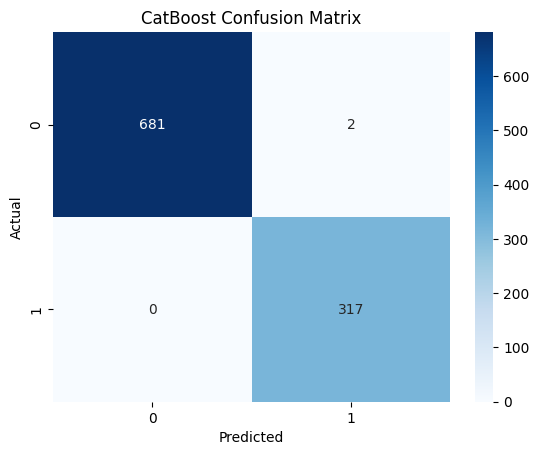


Tuning AdaBoost
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Waktu eksekusi tuning AdaBoost: 145.48 detik
Best Params: {'learning_rate': np.float64(0.9932308858067882), 'n_estimators': 298}
===Train Set===
Accuracy (Train Set): 0.87
Precision (Train Set): 0.86
Recall (Train Set): 0.88
F1-Score (Train Set): 0.87
===Test Set===
Accuracy (Test Set): 0.83
Precision (Test Set): 0.71
Recall (Test Set): 0.77
F1-Score (Test Set): 0.74
===ROC-AUC===
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9476449798625664
roc_auc (crossval test): 0.9416519502457004
Accuracy: 0.828
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       683
           1       0.71      0.77      0.74       317

    accuracy                           0.83      1000
   macro avg       0.80      0.81      0.81      1000
weighted avg       0.83      0.83      0.83      1000



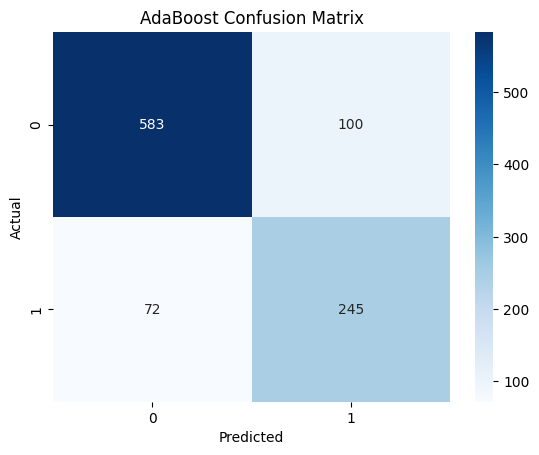


Tuning Ensemble(Voting)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Waktu eksekusi tuning Ensemble(Voting): 5.19 detik
Best Params: {'voting': 'soft'}
===Train Set===
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
===Test Set===
Accuracy (Test Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
===ROC-AUC===
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9999357536364115
Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.99      1.00      1.00       317

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



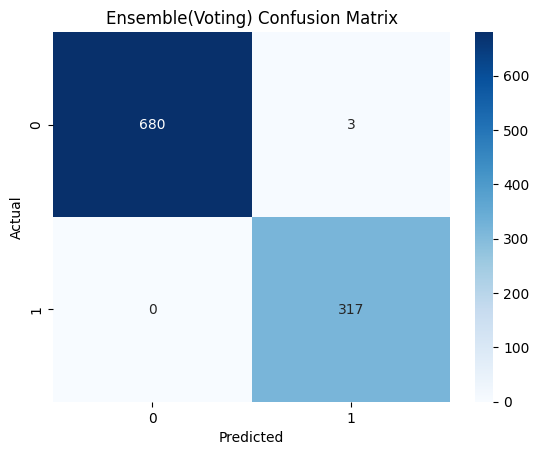

In [ ]:
# Dictionary untuk menyimpan model yang sudah di-tune
tuned_models = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for model_name in models.keys():
    #if model_name == "Ensemble(Voting)":
    #    print(f"\n{'='*60}\n{model_name} Tidak Ditune\n{'='*60}")
    #    continue

    print(f"\n{'='*60}\nTuning {model_name}\n{'='*60}")

    # Inisialisasi model dasar
    base_model = models[model_name]

    # Ambil parameter grid
    param_grid = param_grids[model_name]

    # Setup RandomizedSearchCV
    rs = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_grid,
        n_iter=30,         # Jumlah kombinasi parameter yang dicoba
        scoring='f1',
        cv=5,
        #cv=kfold,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    start_time = time.time()
    rs.fit(X_train_resampled, y_train_resampled)
    end_time = time.time()

    print(f"Waktu eksekusi tuning {model_name}: {end_time - start_time:.2f} detik")
    print("Best Params:", rs.best_params_)

    # Simpan model terbaik
    tuned_models[model_name] = rs.best_estimator_

    #Evaluasi Detail
    eval_classification_tuned(rs.best_estimator_)

    # Evaluasi
    evaluate_model(rs.best_estimator_, X_test_scaled, y_test)

Dari evaluasi hasil hyperparameter tuning:
* model dengan nilai F1-score dan Confusion Matrix terbaik adalah ...
* model yang memberikan peningkatan F1-score signifikan adalah ...
* model yang tidak memberikan peningkatan F1-Score adalah ...

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(models_dict, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, model in models_dict.items():
        # Prediksi probabilitas (kolom ke-1 karena target positif)
        try:
            y_proba = model.predict_proba(X_test)[:, 1]
        except:
            # Jika tidak support predict_proba (jarang terjadi)
            y_proba = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2,
                 label='{} (AUC = {:.2f})'.format(name, roc_auc))

    # Garis acak (random guess)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Model Comparison')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


Logistic Regression - Final Evaluation
Accuracy: 0.803
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       683
           1       0.65      0.81      0.72       317

    accuracy                           0.80      1000
   macro avg       0.78      0.80      0.78      1000
weighted avg       0.82      0.80      0.81      1000



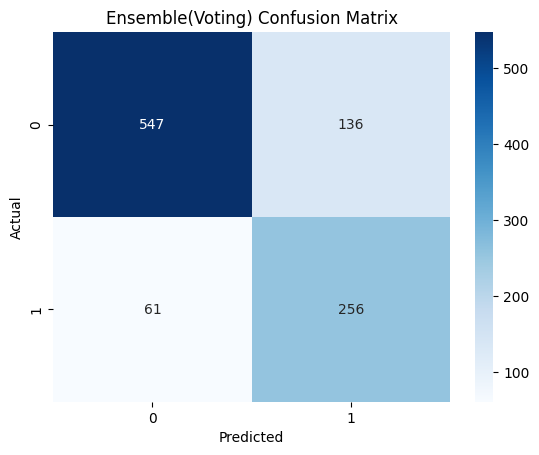


Random Forest - Final Evaluation
Accuracy: 0.994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.99      0.99      0.99       317

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



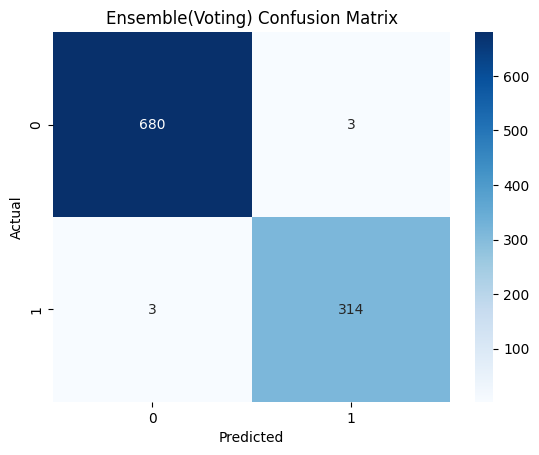


LGBM - Final Evaluation
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       1.00      1.00      1.00       317

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



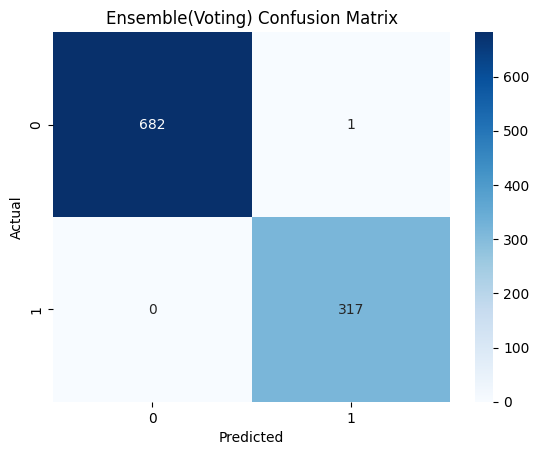


XGBoost - Final Evaluation
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.99      1.00      1.00       317

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



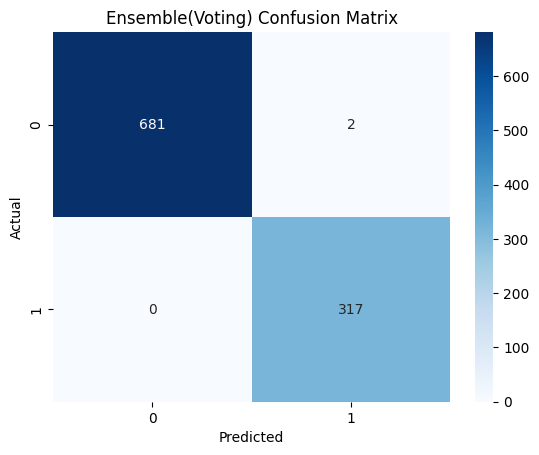


CatBoost - Final Evaluation
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.99      1.00      1.00       317

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



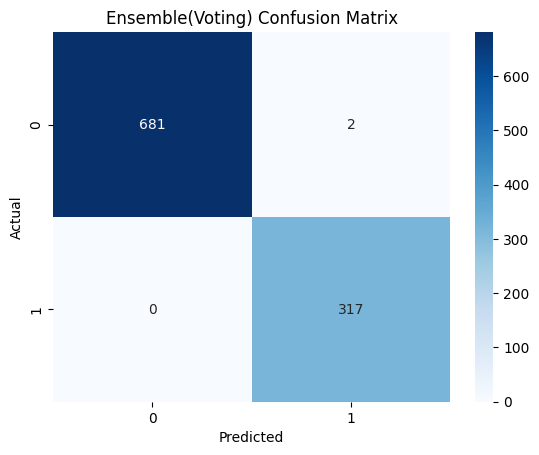


AdaBoost - Final Evaluation
Accuracy: 0.828
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       683
           1       0.71      0.77      0.74       317

    accuracy                           0.83      1000
   macro avg       0.80      0.81      0.81      1000
weighted avg       0.83      0.83      0.83      1000



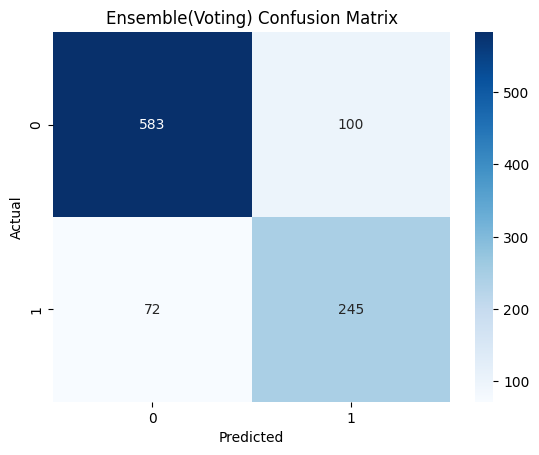


Ensemble(Voting) - Final Evaluation
Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.99      1.00      1.00       317

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



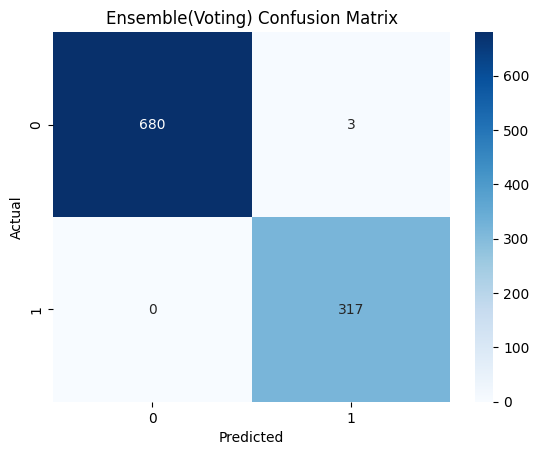

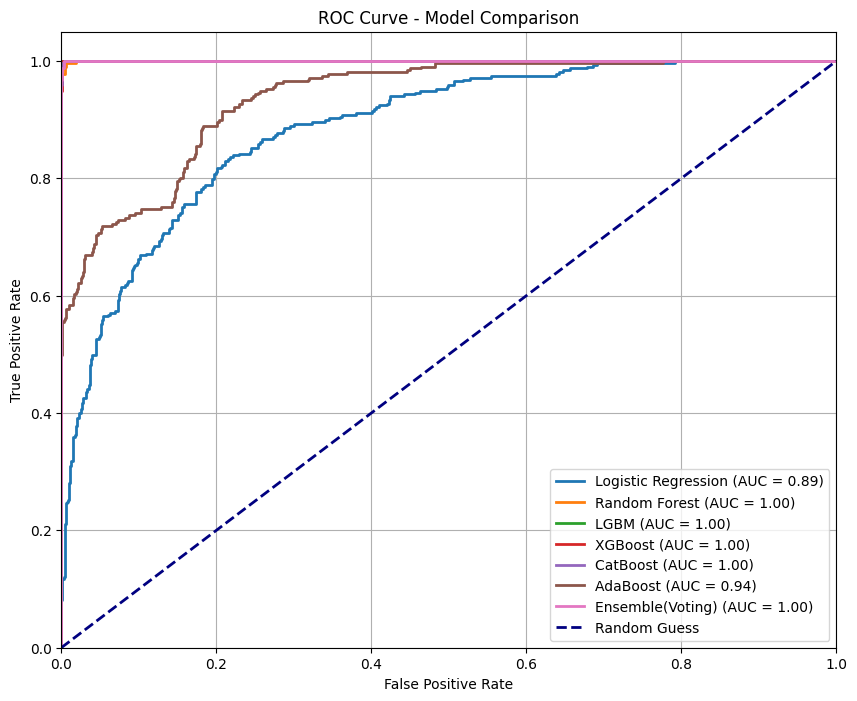

In [ ]:
# Evaluasi akhir + ROC Curve
for name, model in tuned_models.items():
    print(f"\n{'='*60}\n{name} - Final Evaluation\n{'='*60}")
    evaluate_model(model, X_test_scaled, y_test)

# Tampilkan ROC Curve
plot_roc_curve(tuned_models, X_test_scaled, y_test)

Dari evaluasi akhir ROC dan AUC terlihat bahwa model Random Forest, LGBM, XGBoost, dan CatBoost memberikan hasil yang sangat baik.<br>
Sedangkan model Logistic Regression dan AdaBoost masih memberikan False Positif yang lumayan besar

In [ ]:
#Stage 2
#Cross-Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd

def evaluate_models_cv(models_dict, X_train, y_train, cv=5):
    results = []

    for name, model in models_dict.items():
        print(f"\n{'='*60}\nEvaluating {name} with {cv}-fold CV\n{'='*60}")

        # Define metrics to evaluate
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

        # Perform cross-validation for each metric
        scores_acc = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
        scores_pre = cross_val_score(model, X_train, y_train, scoring='precision_macro', cv=cv)
        scores_rec = cross_val_score(model, X_train, y_train, scoring='recall_macro', cv=cv)
        scores_f1 = cross_val_score(model, X_train, y_train, scoring='f1_macro', cv=cv)
        scores_auc = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv)

        # Store results
        results.append({
            'Model': name,
            'Accuracy': f"{scores_acc.mean():.4f} ± {scores_acc.std():.4f}",
            'Precision': f"{scores_pre.mean():.4f} ± {scores_pre.std():.4f}",
            'Recall': f"{scores_rec.mean():.4f} ± {scores_rec.std():.4f}",
            'F1-Score': f"{scores_f1.mean():.4f} ± {scores_f1.std():.4f}",
            'ROC AUC': f"{scores_auc.mean():.4f} ± {scores_auc.std():.4f}"
        })

    # Return as DataFrame
    return pd.DataFrame(results).set_index('Model')

**Cross-Validation Model Dasar (Sebelum Tuning)**

In [ ]:
cv_results_raw = evaluate_models_cv(models, X_train_resampled, y_train_resampled, cv=5)
print(cv_results_raw.sort_values(by='ROC AUC', ascending=False))


Evaluating Logistic Regression with 5-fold CV

Evaluating Random Forest with 5-fold CV

Evaluating LGBM with 5-fold CV
[LightGBM] [Info] Number of positive: 2266, number of negative: 2266
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 4532, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2266, number of negative: 2267
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM]

**Cross-Validation Model Hasil Hyperparameter Tuning**

In [ ]:
cv_results_tuned = evaluate_models_cv(tuned_models, X_train_resampled, y_train_resampled, cv=5)
print(cv_results_tuned.sort_values(by='ROC AUC', ascending=False))


Evaluating Logistic Regression with 5-fold CV

Evaluating Random Forest with 5-fold CV

Evaluating LGBM with 5-fold CV
[LightGBM] [Info] Number of positive: 2266, number of negative: 2266
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 4532, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

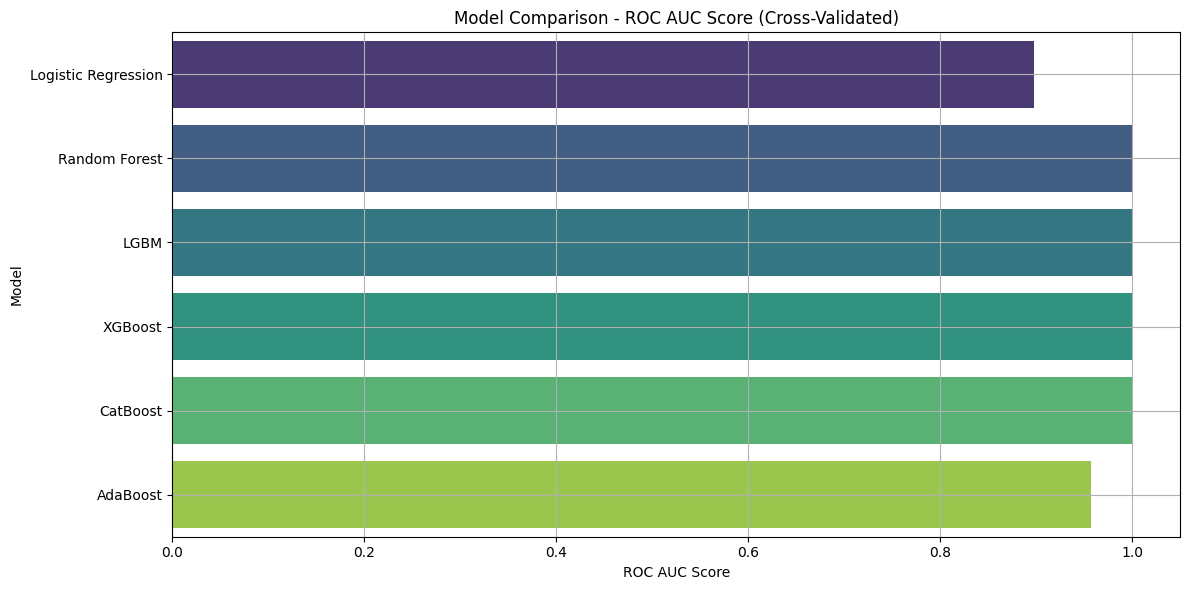

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index untuk plotting
plot_df = cv_results_tuned[['ROC AUC']].copy()
plot_df['ROC AUC'] = plot_df['ROC AUC'].str.split("±").str[0].astype(float)

plt.figure(figsize=(12, 6))
sns.barplot(x=plot_df['ROC AUC'], y=plot_df.index, palette="viridis")
plt.title('Model Comparison - ROC AUC Score (Cross-Validated)')
plt.xlabel('ROC AUC Score')
plt.ylabel('Model')
plt.grid(True)
plt.tight_layout()
plt.show()

Dari evaluasi Cross-Validation baik untuk model sebelum dan setelah Hyperparameter Tuning terlihat bahwa :
* model Random Forest, LGBM, XGBoost, dan CatBoost memberikan hasil yang sangat baik
* model Logistic Regression dan AdaBoost hasilnya lebih rendah dari ke empat model lainnya

##Perbandingan Performa Model [Stage 3]
Dari hasil simulasi diatas, maka diperoleh perbandingan performa antar model sebagai berikut:

##Explainability & Fairness Analysis [Stage 3]

In [ ]:
# Stage 3
#Analisis Fairness


In [ ]:
#Explainability
#SHAP atau LIME


##Analisis Interpretabilitas

##Error Analysis & Business Impact Assesment


In [ ]:
#Kesalahan Model
#confussion matrix atau residual plot


##Business Impact dari Model
bagaimana prediksi mempengaruhi keputusan bisnis?

##Rekomendasi Perbaikan Model
xxxxx